In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
csv_path = "../data/URSalesExtract2.csv"

In [22]:
SalesDF = pd.read_csv(csv_path)
SalesDF

,Business Date,Net Sales Total (Sum),Number of Checks (Sum),Revenue Center Name
0,7/1/2017,0.00,0,Cellar
1,7/1/2017,613.81,59,ETC
2,7/1/2017,0.00,0,Tylers
3,7/1/2017,0.00,0,8:15
4,7/1/2017,0.00,0,Passport
...,...,...,...,...
8761,6/30/2021,0.00,0,ETC
8762,6/30/2021,0.00,0,Tylers
8763,6/30/2021,0.00,0,8:15
8764,6/30/2021,0.00,0,Passport


In [23]:
SalesDF['Business Date'] = pd.to_datetime(SalesDF["Business Date"])

In [24]:
SalesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Business Date            8766 non-null   datetime64[ns]
 1   Net Sales Total  (Sum)   8766 non-null   float64       
 2   Number of Checks  (Sum)  8766 non-null   int64         
 3   Revenue Center Name      8766 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 274.1+ KB


In [25]:
SalesDF['Day of Week'] = SalesDF["Business Date"].dt.dayofweek
SalesDF['Month'] = SalesDF["Business Date"].dt.month
SalesDF['Year'] = SalesDF["Business Date"].dt.year
SalesDF['Quarter'] = SalesDF["Business Date"].dt.to_period('Q-JUN')
SalesDF['FY'] = SalesDF["Quarter"].dt.qyear

In [26]:
SalesDF

,Business Date,Net Sales Total (Sum),Number of Checks (Sum),Revenue Center Name,Day of Week,Month,Year,Quarter,FY
0,2017-07-01,0.00,0,Cellar,5,7,2017,2018Q1,2018
1,2017-07-01,613.81,59,ETC,5,7,2017,2018Q1,2018
2,2017-07-01,0.00,0,Tylers,5,7,2017,2018Q1,2018
3,2017-07-01,0.00,0,8:15,5,7,2017,2018Q1,2018
4,2017-07-01,0.00,0,Passport,5,7,2017,2018Q1,2018
...,...,...,...,...,...,...,...,...,...
8761,2021-06-30,0.00,0,ETC,2,6,2021,2021Q4,2021
8762,2021-06-30,0.00,0,Tylers,2,6,2021,2021Q4,2021
8763,2021-06-30,0.00,0,8:15,2,6,2021,2021Q4,2021
8764,2021-06-30,0.00,0,Passport,2,6,2021,2021Q4,2021


In [37]:
# Separate Zero vales from Net Sales and calculate percentiles 
ETCSalesDF = SalesDF.loc[SalesDF['Revenue Center Name'] == "ETC"]
ETCSalesnoZero = ETCSalesDF.loc[ETCSalesDF["Net Sales Total  (Sum)"] != 0]
ETCSalesnoZero["Net Sales Total  (Sum)"].describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

count     1309.000000
mean      5483.801451
std       4080.893366
min          1.290000
10%        149.542000
20%        804.498000
30%       1436.118000
40%       4664.478000
50%       6545.840000
60%       7352.374000
70%       8105.720000
80%       9030.664000
90%      10475.958000
95%      11266.670000
max      26666.430000
Name: Net Sales Total  (Sum), dtype: float64

<AxesSubplot:ylabel='Frequency'>

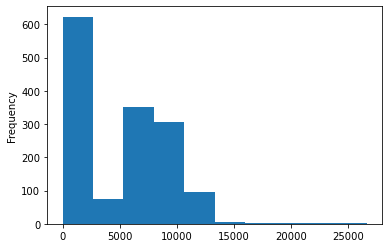

In [36]:
# With Zero Vales is Skewed
# Dropping zero values because more are due to Covid closures than anything else
ETCSalesDF['Net Sales Total  (Sum)'].plot(kind= 'hist')

,Business Date,Net Sales Total (Sum),Number of Checks (Sum),Revenue Center Name,Day of Week,Month,Year,Quarter,FY
1,2017-07-01,613.81,59,ETC,5,7,2017,2018Q1,2018
7,2017-07-02,695.18,75,ETC,6,7,2017,2018Q1,2018
13,2017-07-03,1061.64,178,ETC,0,7,2017,2018Q1,2018
19,2017-07-04,63.42,1,ETC,1,7,2017,2018Q1,2018
25,2017-07-05,1546.13,227,ETC,2,7,2017,2018Q1,2018
...,...,...,...,...,...,...,...,...,...
8731,2021-06-25,883.72,100,ETC,4,6,2021,2021Q4,2021
8737,2021-06-26,895.62,79,ETC,5,6,2021,2021Q4,2021
8743,2021-06-27,1136.75,78,ETC,6,6,2021,2021Q4,2021
8749,2021-06-28,1939.43,143,ETC,0,6,2021,2021Q4,2021


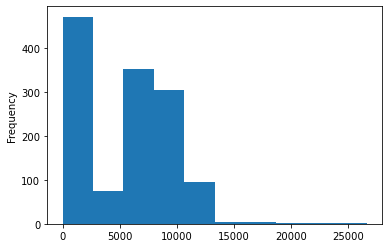

In [38]:
# Without Zero values, still skewed due to summer break
ETCSalesnoZero["Net Sales Total  (Sum)"].plot(kind='hist')
ETCSalesnoZero

In [42]:
# Separate Zero vales from Net Sales and calculate percentiles 
ETCSalesDF = SalesDF.loc[SalesDF['Revenue Center Name'] == "ETC"]
ETCSalesnoCovid = ETCSalesDF.loc[ETCSalesDF["Net Sales Total  (Sum)"] >100]
ETCSalesnoCovid["Net Sales Total  (Sum)"].describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])
# ETCSalesnoCovid["Net Sales Total  (Sum)"].plot(kind='hist')

count     1192.000000
mean      6019.239715
std       3883.219331
min        103.930000
10%        653.452000
20%       1262.116000
30%       2791.465000
40%       5948.130000
50%       6899.060000
60%       7610.270000
70%       8308.494000
80%       9251.458000
90%      10571.190000
95%      11346.542500
max      26666.430000
Name: Net Sales Total  (Sum), dtype: float64